In [1]:
#imports
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import time, urllib.request, requests

In [2]:
service = webdriver.ChromeService(executable_path='C:\chromedriver-win64\chromedriver.exe')
driver = webdriver.Chrome(service=service)

In [3]:
driver.get("http://www.instagram.com")

In [4]:
username = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR,"input[name='username']")))
password = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR,"input[name='password']")))

In [5]:
username.clear()
username.send_keys("danielxavieroei@gmail.com")
password.clear()
password.send_keys("enter your password")

In [6]:
button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR,"button[type='submit']"))).click()

In [7]:
time.sleep(5)
alert = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Save Info")]')))
alert.click()

In [8]:
time.sleep(5)
alert = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Not Now")]')))
alert.click()

In [9]:
keyword = "yoonjiiii"
driver.get("http://www.instagram.com" + "/" + keyword + "/")

In [10]:
driver.execute_script("window.scrollTo(0,4000);")

In [20]:
images = driver.find_elements(By.TAG_NAME, 'img')
images = [image.get_attribute('src') for image in images]

print('Number of scraped images: ', len(images))

Number of scraped images:  29


['',
 '',
 'https://scontent.cdninstagram.com/v/t51.2885-19/32307834_598470877184893_3423528872707096576_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent.cdninstagram.com&_nc_cat=101&_nc_ohc=gf33Oci8nfkAX_ym47T&edm=APs17CUBAAAA&ccb=7-5&oh=00_AfDtl4vU4EQ9k6V9QSNjc176sMLYRrejx3JdAtBgZFrr3Q&oe=652A1FB1&_nc_sid=10d13b',
 'https://instagram.fcgk29-1.fna.fbcdn.net/v/t51.2885-19/274748404_1110211226446698_4659654918631608602_n.jpg?stp=dst-jpg_s320x320&_nc_ht=instagram.fcgk29-1.fna.fbcdn.net&_nc_cat=106&_nc_ohc=H1g9sKUAyg0AX8PSSeF&edm=AOQ1c0wBAAAA&ccb=7-5&oh=00_AfBHevtLcTS1Lc-qw5IB1K4Namexp5pQhPvWZW6scjDClg&oe=6529ED12&_nc_sid=8b3546',
 'https://instagram.fcgk29-1.fna.fbcdn.net/v/t51.2885-15/345475117_249911550933332_6236462722388369680_n.jpg?stp=c0.247.640.640a_dst-jpg_e15_s150x150&_nc_ht=instagram.fcgk29-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=_sm6Ggk7zEgAX-CJFkQ&edm=AGW0Xe4BAAAA&ccb=7-5&oh=00_AfAUMmxrQkEU47MVwAA2VJuB3so1LyoLrym9fbFr7RH5QQ&oe=6525E0EC&_nc_sid=94fea1',
 'https://instagram.fcgk29-1.fna.
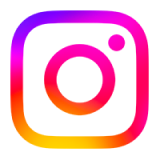
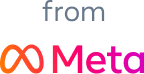

In [21]:
images

In [22]:
import os

path = os.getcwd()
path = os.path.join(path, keyword[0:] + " posts")

os.mkdir(path)
path

'C:\\Users\\User\\Documents\\Python Projects\\Instagram Scraping - Posts\\yoonjiiii posts'

In [23]:
import requests
import os
import base64
from io import BytesIO
from PIL import Image

In [24]:
def download_and_save_base64(base64_data, path, keyword, counter):
    try:
        image_data = base64.b64decode(base64_data)

        file_name = f"{keyword[1:]}_{counter}.jpg"
        save_as = os.path.join(path, file_name)

        with open(save_as, 'wb') as f:
            f.write(image_data)

        print(f"Downloaded and saved {file_name}")
    except Exception as e:
        print(f"An error occurred while saving base64 image: {e}")

In [32]:
keyword2 = " Instagram"

counter = 0
for image in images:
    try:
        if image.startswith("data:image/"):
            download_and_save_base64(image.split(',')[1], path, keyword2, counter)
        else:
            response = requests.get(image)
            if response.status_code == 200:
                file_name = f"{keyword[0:]}_{counter}.jpg"
                save_as = os.path.join(path, file_name)
                with open(save_as, 'wb') as f:
                    f.write(response.content)
                print(f"Downloaded {file_name}")
            else:
                print(f"Failed to download {image}")
    except Exception as e:
        print(f"An error occurred while processing {image}: {e}")
    
    counter += 1

Downloaded and saved Instagram_0.jpg
Downloaded and saved Instagram_1.jpg
Downloaded yoonjiiii_2.jpg
Downloaded yoonjiiii_3.jpg
Downloaded yoonjiiii_4.jpg
Downloaded yoonjiiii_5.jpg
Downloaded yoonjiiii_6.jpg
Downloaded yoonjiiii_7.jpg
Downloaded yoonjiiii_8.jpg
Downloaded yoonjiiii_9.jpg
Downloaded yoonjiiii_10.jpg
Downloaded yoonjiiii_11.jpg
Downloaded yoonjiiii_12.jpg
Downloaded yoonjiiii_13.jpg
Downloaded yoonjiiii_14.jpg
Downloaded yoonjiiii_15.jpg
Downloaded yoonjiiii_16.jpg
Downloaded yoonjiiii_17.jpg
Downloaded yoonjiiii_18.jpg
Downloaded yoonjiiii_19.jpg
Downloaded yoonjiiii_20.jpg
Downloaded yoonjiiii_21.jpg
Downloaded yoonjiiii_22.jpg
Downloaded yoonjiiii_23.jpg
Downloaded yoonjiiii_24.jpg
Downloaded yoonjiiii_25.jpg
Downloaded yoonjiiii_26.jpg
Downloaded yoonjiiii_27.jpg
Downloaded yoonjiiii_28.jpg
